In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess data
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'

stk_data = yf.download(symbol, start=start, end=end)
stk_data = stk_data[["Open", "High", "Low", "Close"]]

[*********************100%%**********************]  1 of 1 completed


In [11]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [3]:
# Define rmsemape function
def rmsemape(y_Test, predicted_stock_price_test_ori):
    mse = mean_squared_error(y_Test, predicted_stock_price_test_ori)
    rmse = np.sqrt(mse)
    print("RMSE-Testset:", rmse)
    mape = np.mean(np.abs((y_Test - predicted_stock_price_test_ori) / y_Test)) * 100
    print("MAPE-Testset:", mape)


In [12]:
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data)
data1 = pd.DataFrame(data1, columns=["Open", "High", "Low", "Close"])
data1

,Open,High,Low,Close
0,0.508982,0.441549,0.543815,0.491495
1,0.497006,0.433854,0.540997,0.513145
2,0.544411,0.479275,0.593970,0.563144
3,0.543912,0.504095,0.604114,0.552835
4,0.538423,0.489203,0.587489,0.576289
...,...,...,...,...
138,0.385230,0.330107,0.398422,0.404639
139,0.414421,0.355920,0.417864,0.401031
140,0.369261,0.296848,0.338405,0.316495
141,0.334331,0.252916,0.226543,0.275773


In [5]:
# Train-test split
training_size = round(len(data1) * 0.80)
train_data, test_data = data1[:training_size], data1[training_size:]


In [6]:
# Fit SES model for each column
forecasts = {}
for column in ["Open", "High", "Low", "Close"]:
    model = SimpleExpSmoothing(train_data[column]).fit()
    forecasts[column] = model.forecast(steps=len(test_data))


In [7]:
# Convert forecasts to DataFrame
forecast_df = pd.DataFrame(forecasts, index=test_data.index)
forecast_df

,Open,High,Low,Close
114,0.321357,0.270787,0.335587,0.316495
115,0.321357,0.270787,0.335587,0.316495
116,0.321357,0.270787,0.335587,0.316495
117,0.321357,0.270787,0.335587,0.316495
118,0.321357,0.270787,0.335587,0.316495
119,0.321357,0.270787,0.335587,0.316495
120,0.321357,0.270787,0.335587,0.316495
121,0.321357,0.270787,0.335587,0.316495
122,0.321357,0.270787,0.335587,0.316495
123,0.321357,0.270787,0.335587,0.316495


In [8]:
# Inverse transform the forecasted data
forecast_df_inv = Ms.inverse_transform(forecast_df)
test_data_inv = Ms.inverse_transform(test_data)

# Convert to DataFrame
forecast_df_inv = pd.DataFrame(forecast_df_inv, columns=["Open", "High", "Low", "Close"])
test_data_inv = pd.DataFrame(test_data_inv, columns=["Open", "High", "Low", "Close"])
test_data_inv

,Open,High,Low,Close
0,719.000000,721.950012,705.049988,709.650024
1,707.500000,708.000000,685.099976,688.900024
2,680.950012,681.849976,660.099976,674.349976
3,683.000000,683.000000,662.500000,665.849976
4,670.000000,676.849976,664.000000,669.349976
5,677.000000,684.500000,672.599976,678.799988
6,681.150024,682.000000,662.450012,667.500000
7,663.049988,674.599976,655.950012,672.150024
8,677.299988,680.849976,672.000000,675.450012
9,674.500000,679.599976,667.250000,670.500000


In [9]:
# Evaluation
for column in ["Open", "High", "Low", "Close"]:
    print(f"Evaluating {column} prices")
    rmsemape(test_data_inv[column], forecast_df_inv[column])
    print("************")

Evaluating Open prices
RMSE-Testset: 27.26677532348275
MAPE-Testset: 3.2970438667811734
************
Evaluating High prices
RMSE-Testset: 27.986674072950237
MAPE-Testset: 3.4485741537913555
************
Evaluating Low prices
RMSE-Testset: 29.065339970001308
MAPE-Testset: 3.5151919900982445
************
Evaluating Close prices
RMSE-Testset: 29.036593143070803
MAPE-Testset: 3.595705914180715
************


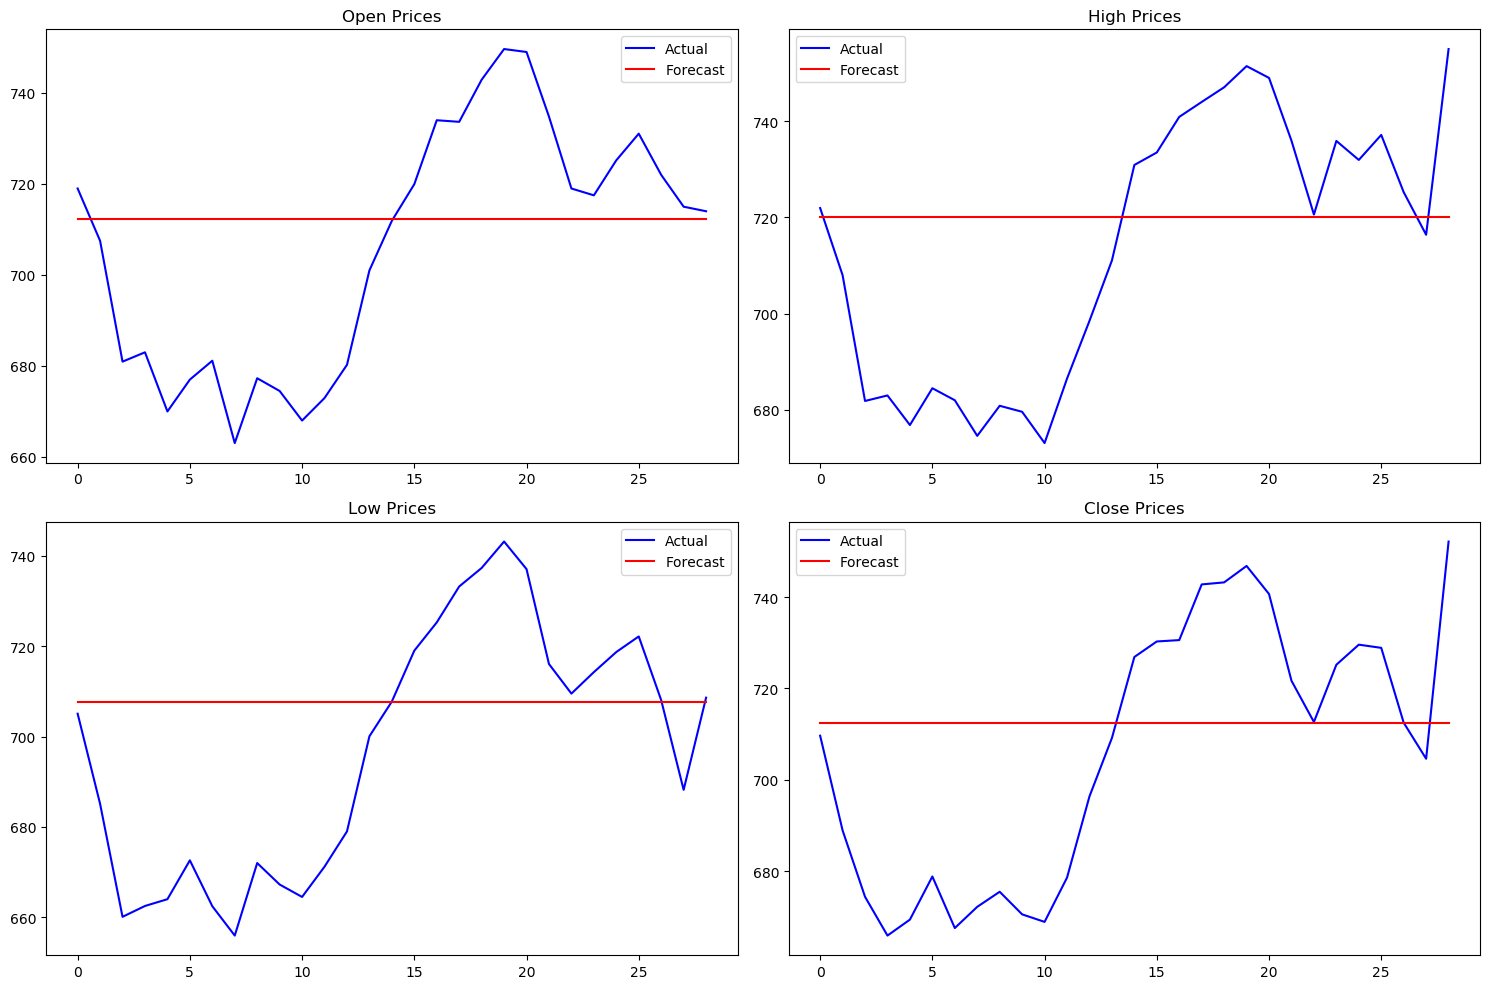

In [10]:
# Plotting results
plt.figure(figsize=(15, 10))
for i, column in enumerate(["Open", "High", "Low", "Close"], 1):
    plt.subplot(2, 2, i)
    plt.plot(test_data_inv[column], label='Actual', color='blue')
    plt.plot(forecast_df_inv[column], label='Forecast', color='red')
    plt.title(f'{column} Prices')
    plt.legend()

plt.tight_layout()
plt.show()